Datasets Import

In [2]:
import pandas as pd
import numpy as np
from arch import arch_model

stock_data={
    'Axis_Bank':pd.read_csv('./Datasets/Axis_Bank.csv',index_col=0),
    'Bajaj_Finance':pd.read_csv('./Datasets/Bajaj_Finance.csv',index_col=0),
    'Coal_India':pd.read_csv('./Datasets/Coal_India.csv',index_col=0),
    'HCL_Tech':pd.read_csv('./Datasets/HCL_Tech.csv',index_col=0),
    'HDFC_Bank':pd.read_csv('./Datasets/HDFC_Bank.csv',index_col=0),
    'Hinudstan_Unilever':pd.read_csv('./Datasets/Hindustan_Unilever.csv',index_col=0),
    'ICICI_Bank':pd.read_csv('./Datasets/ICICI_Bank.csv',index_col=0),
            'Infosys':pd.read_csv('./Datasets/Infosys.csv',index_col=0),
    'ITC':pd.read_csv('./Datasets/ITC.csv',index_col=0),'Kotak_Mahindra':pd.read_csv('./Datasets/Kotak_Mahindra.csv',index_col=0),
    'L&T':pd.read_csv('./Datasets/L&T.csv',index_col=0),
    'Maruti_Suzuki':pd.read_csv('./Datasets/Maruti_Suzuki.csv',index_col=0),
    'NTPC':pd.read_csv('./Datasets/NTPC.csv',index_col=0),
    'ONGC':pd.read_csv('./Datasets/ONGC.csv',index_col=0),
    'PowerGrid':pd.read_csv('./Datasets/PowerGrid_Corp.csv',index_col=0),
    'Reliance_Industries':pd.read_csv('./Datasets/Reliance_Industries.csv',index_col=0),
    'SBI':pd.read_csv('./Datasets/SBI.csv',index_col=0),
    'Tata_Motors':pd.read_csv('./Datasets/Tata_Motors.csv',index_col=0),
    'TCS':pd.read_csv('./Datasets/TCS.csv',index_col=0),
    'UltraTech':pd.read_csv('./Datasets/UltraTech.csv',index_col=0)

}



Best AIC Function

In [3]:
def select_best_order(returns):
    best_aic = np.inf  # Initialize with a very large value
    best_order = None

    # Loop over potential values of p and q
    for p in range(1, 6):  # Maximum lag order for ARCH model
        for q in range(1, 6):  # Maximum lag order for GARCH model
            # Fit ARCH/GARCH model with current p and q values
            model = arch_model(returns, vol='Garch', p=p, q=q,rescale=False)
            result = model.fit(disp='off')  # Suppress output for simplicity
            
            # Calculate AIC
            aic = result.aic
            
            # Check if current AIC is the best so far
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                p_value=p
                q_value=q

    return best_aic, best_order,p_value,q_value

GARCH Model Function

In [4]:
def fit_garch_model_and_forecast_volatility(rescaled_returns, p_value, q_value):
    # Fit GARCH model
    model = arch_model(rescaled_returns, vol='Garch', p=p_value, q=q_value, rescale=False)
    fitted_model = model.fit(disp='off')  # Suppress output for simplicity

    # Forecast volatility for the next 1 day
    forecast = fitted_model.forecast(horizon=1)
    forecast_volatility = np.sqrt(forecast.variance.iloc[-1].values[0])
    
    return forecast_volatility

AIC Results

In [21]:
volatility_results = {}

# Loop over each company's stock price data
actual_volatilities={}
thresholded_stocks = []
threshold = 0.05  # Define threshold for volatility

for company, data in stock_data.items():
    # Calculate returns
    returns = data['Close'].pct_change().dropna()  
    rescaled_returns=returns
    squared_diff = rescaled_returns ** 2
    actual_volatilities[company] = squared_diff.mean()
    best_aic, best_order,p_value,q_value = select_best_order(rescaled_returns)
    print("Best AIC for:",company, best_aic)
    print("Best Order (p, q):", best_order)

    volatility_results[company] = fit_garch_model_and_forecast_volatility(rescaled_returns, p_value, q_value)
    forecasted_volatilities = np.array(list(volatility_results.values())).reshape(-1, 1)
    # Store the result in the dictionary

Best AIC for: Axis_Bank -4362.335567783504
Best Order (p, q): (1, 1)
Best AIC for: Bajaj_Finance -4106.517751199837
Best Order (p, q): (4, 3)
Best AIC for: Coal_India -4035.323304527393
Best Order (p, q): (1, 2)
Best AIC for: HCL_Tech -4426.968163052792
Best Order (p, q): (1, 1)
Best AIC for: HDFC_Bank -4570.805029386023
Best Order (p, q): (1, 2)
Best AIC for: Hinudstan_Unilever -4724.632352017566
Best Order (p, q): (1, 2)
Best AIC for: ICICI_Bank -4545.867112398357
Best Order (p, q): (1, 4)
Best AIC for: Infosys -4431.293657073018
Best Order (p, q): (1, 3)
Best AIC for: ITC -4625.118868982354
Best Order (p, q): (3, 2)
Best AIC for: Kotak_Mahindra -4548.094135178204
Best Order (p, q): (1, 2)
Best AIC for: L&T -5644.378712580734
Best Order (p, q): (2, 4)
Best AIC for: Maruti_Suzuki -4488.777099591656
Best Order (p, q): (1, 2)
Best AIC for: NTPC -4335.682197017768
Best Order (p, q): (1, 2)
Best AIC for: ONGC -4026.248758448403
Best Order (p, q): (2, 4)
Best AIC for: PowerGrid -4286.68030

Forecasted Volatilities V/S Actual

In [22]:
volatilities={}
for company, volatility in volatility_results.items():
        if volatility <= threshold:
            thresholded_stocks.append(company)
print("Forecasted Volatility Results:")
for company, volatility in volatility_results.items():
    volatilities[company]=volatility
    print(f"{company}: {volatility}")
print('\n')
print("Actual Volatility Results:")
for company, volatility in actual_volatilities.items():
    actual_volatilities[company]=volatility
    print(f"{company}: {volatility}")

Forecasted Volatility Results:
Axis_Bank: 0.01371214230055575
Bajaj_Finance: 0.01600356701080269
Coal_India: 0.022082548486808542
HCL_Tech: 0.014763698650303289
HDFC_Bank: 0.01142352538159613
Hinudstan_Unilever: 0.012044774412859791
ICICI_Bank: 0.012113151805205986
Infosys: 0.01409163508817392
ITC: 0.014652394104110077
Kotak_Mahindra: 0.011865452139342349
L&T: 0.01596820007820523
Maruti_Suzuki: 0.01510889473779621
NTPC: 0.01845457585476098
ONGC: 0.01945199684947124
PowerGrid: 0.02038956818252686
Reliance_Industries: 0.014625263171074179
SBI: 0.01611924807108784
Tata_Motors: 0.017996311735768315
TCS: 0.013643096208354306
UltraTech: 0.012388381669224848


Actual Volatility Results:
Axis_Bank: 0.0002733728200634011
Bajaj_Finance: 0.0003552687431494324
Coal_India: 0.0004077203790160743
HCL_Tech: 0.0002349517645763547
HDFC_Bank: 0.0002057649210463789
Hinudstan_Unilever: 0.0001654699853306537
ICICI_Bank: 0.00022504677455364162
Infosys: 0.00023532587676676858
ITC: 0.00019040769819143554
Kotak

In [30]:
from importnb import Notebook
with Notebook():
    from Models.kmeans import find_optimal_k_and_cluster


Optimak k & silhouette score calculation

In [24]:
optimal_k, silhouette_scores = find_optimal_k_and_cluster(forecasted_volatilities)

print("Optimal number of clusters (k):", optimal_k)
print(silhouette_scores)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Optimal number of clusters (k): 3
[0.6362426457944522, 0.5900961615687937, 0.5925964090573574]


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score plot

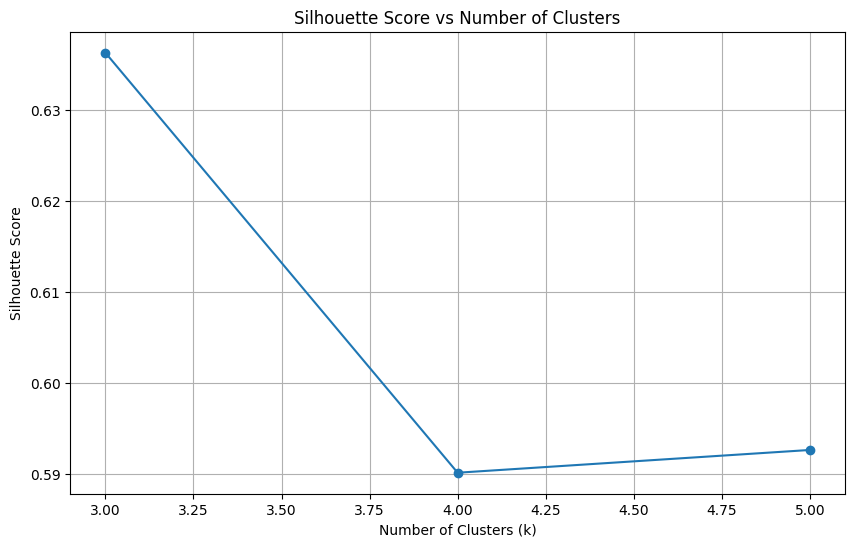

In [31]:
import matplotlib.pyplot as plt
min_k=3
max_k=5
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_k, max_k + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()
